# Example: Multiclass classification
------------------------------------

This example shows how to compare the performance of three models on a multiclass classification task.

Import the wine dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-dataset). This is a small and easy to train dataset whose goal is to predict wines into three groups (which cultivator it's from) using features based on the results of chemical analysis.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_wine
from atom import ATOMClassifier

In [2]:
# Load data
X, y = load_wine(return_X_y=True, as_frame=True)

# Let's have a look
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Run the pipeline

In [3]:
atom = ATOMClassifier(X, y, n_jobs=-1, verbose=2, random_state=1)

# Fit the pipeline with the selected models
atom.run(
    models=["LR","LDA", "RF"],
    metric="roc_auc_ovr",
    n_trials=14,
    n_bootstrap=5,
    errors="raise",
)

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Multiclass classification.
Parallel processing with 16 cores.
Parallelization backend: loky

Dataset stats ==================== >>
Shape: (178, 14)
Train set size: 143
Test set size: 35
-------------------------------------
Memory: 19.36 kB
Scaled: False
Outlier values: 12 (0.6%)


Training ========================= >>
Models: LR, LDA, RF
Metric: roc_auc_ovr


Running hyperparameter tuning for LogisticRegression...
| trial | penalty |       C |  solver | max_iter | l1_ratio | roc_auc_ovr | best_roc_auc_ovr | time_trial | time_ht |    state |
| ----- | ------- | ------- | ------- | -------- | -------- | ----------- | ---------------- | ---------- | ------- | -------- |
| 0     |      l1 |  0.0054 |    saga |      480 |      0.7 |         0.5 |              0.5 |    10.567s | 10.567s | COMPLETE |
| 1     |      l1 |   0.122 |    saga |      380 |      0.7 |      0.9951 |           0.99

## Analyze the results

In [4]:
atom.results

,roc_auc_ovr_ht,time_ht,roc_auc_ovr_train,roc_auc_ovr_test,time_fit,roc_auc_ovr_bootstrap,time_bootstrap,time
LR,1.0,128.337325,0.9979,0.9977,0.542487,0.998413,0.602810,129.482622
LDA,1.0,0.207456,1.0000,0.9989,0.025409,0.999773,0.038035,0.270900
RF,1.0,26.080413,0.9951,0.9919,0.737324,0.993613,0.721398,27.539135


In [5]:
# Show the score for some different metrics
atom.evaluate(["precision_macro", "recall_macro", "jaccard_weighted"])

,precision_macro,recall_macro,jaccard_weighted
LR,0.9429,0.9484,0.8924
LDA,0.9667,0.9762,0.9457
RF,0.8799,0.8915,0.7968


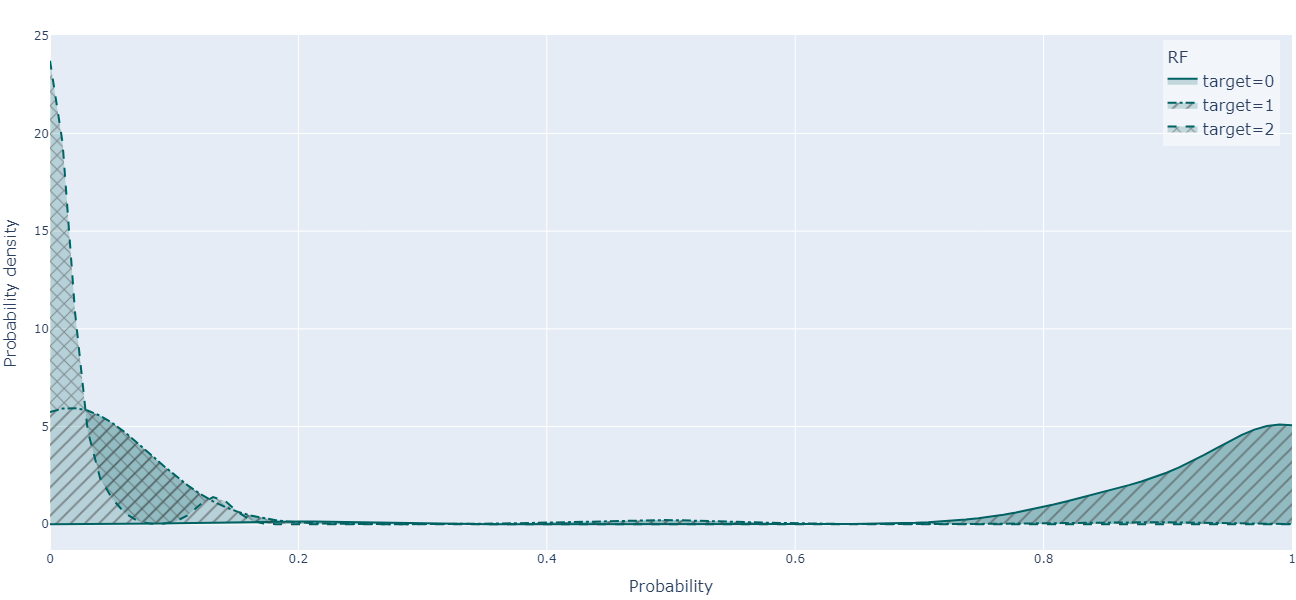

In [10]:
# Some plots allow you to choose the target class to look at
atom.rf.plot_probabilities(rows="train", target=0)

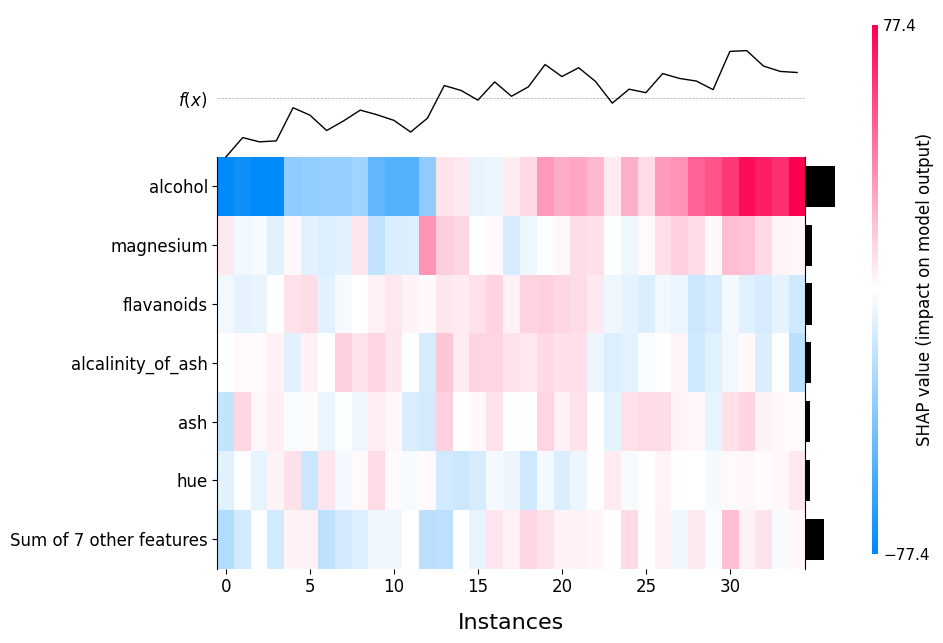

In [8]:
atom.lda.plot_shap_heatmap(target=2, show=7)